#### Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import os

#### Get files from and confirm that data is as expected with coordinates and variables

##### Then, specifically take out the data variables needed and concat to make one xarray

In [3]:
path = '/scratch/aabramow/dustmerrafullyear/'
fname = 'MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4'
ds = xr.open_dataset(path+fname)
ds


<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-01-01T23:30:00
Data variables: (12/115)
    BCDP001   (time, lat, lon) float32 ...
    BCDP002   (time, lat, lon) float32 ...
    BCEM001   (time, lat, lon) float32 ...
    BCEM002   (time, lat, lon) float32 ...
    BCEMAN    (time, lat, lon) float32 ...
    BCEMBB    (time, lat, lon) float32 ...
    ...        ...
    SUSV003   (time, lat, lon) float32 ...
    SUSV004   (time, lat, lon) float32 ...
    SUWT001   (time, lat, lon) float32 ...
    SUWT002   (time, lat, lon) float32 ...
    SUWT003   (time, lat, lon) float32 ...
    SUWT004   (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-01-01
    RangeEndingTime:                   23:59:59.000000

In [4]:
os.listdir(path)

['MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150102.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150103.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150104.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150105.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150106.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150107.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150108.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150109.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150110.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150111.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150112.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150113.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150114.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150115.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150116.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150117.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150118.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150119.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150120.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150121.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.20150122.nc4',
 'MERRA2_400.tavg1_2d_adg_Nx.201

In [5]:
varlist = list(ds.variables.keys())
varlist

['lon',
 'lat',
 'time',
 'BCDP001',
 'BCDP002',
 'BCEM001',
 'BCEM002',
 'BCEMAN',
 'BCEMBB',
 'BCEMBF',
 'BCHYPHIL',
 'BCSD001',
 'BCSD002',
 'BCSV001',
 'BCSV002',
 'BCWT001',
 'BCWT002',
 'DUAERIDX',
 'DUDP001',
 'DUDP002',
 'DUDP003',
 'DUDP004',
 'DUDP005',
 'DUEM001',
 'DUEM002',
 'DUEM003',
 'DUEM004',
 'DUEM005',
 'DUEXTTFM',
 'DUSCATFM',
 'DUSD001',
 'DUSD002',
 'DUSD003',
 'DUSD004',
 'DUSD005',
 'DUSV001',
 'DUSV002',
 'DUSV003',
 'DUSV004',
 'DUSV005',
 'DUWT001',
 'DUWT002',
 'DUWT003',
 'DUWT004',
 'DUWT005',
 'OCDP001',
 'OCDP002',
 'OCEM001',
 'OCEM002',
 'OCEMAN',
 'OCEMBB',
 'OCEMBF',
 'OCEMBG',
 'OCHYPHIL',
 'OCSD001',
 'OCSD002',
 'OCSV001',
 'OCSV002',
 'OCWT001',
 'OCWT002',
 'SO2EMAN',
 'SO2EMBB',
 'SO2EMVE',
 'SO2EMVN',
 'SO4EMAN',
 'SSAERIDX',
 'SSDP001',
 'SSDP002',
 'SSDP003',
 'SSDP004',
 'SSDP005',
 'SSEM001',
 'SSEM002',
 'SSEM003',
 'SSEM004',
 'SSEM005',
 'SSEXTTFM',
 'SSSCATFM',
 'SSSD001',
 'SSSD002',
 'SSSD003',
 'SSSD004',
 'SSSD005',
 'SSSV001',
 '

In [6]:
varlist.remove('DUEXTTFM')

In [7]:
varlist

['lon',
 'lat',
 'time',
 'BCDP001',
 'BCDP002',
 'BCEM001',
 'BCEM002',
 'BCEMAN',
 'BCEMBB',
 'BCEMBF',
 'BCHYPHIL',
 'BCSD001',
 'BCSD002',
 'BCSV001',
 'BCSV002',
 'BCWT001',
 'BCWT002',
 'DUAERIDX',
 'DUDP001',
 'DUDP002',
 'DUDP003',
 'DUDP004',
 'DUDP005',
 'DUEM001',
 'DUEM002',
 'DUEM003',
 'DUEM004',
 'DUEM005',
 'DUSCATFM',
 'DUSD001',
 'DUSD002',
 'DUSD003',
 'DUSD004',
 'DUSD005',
 'DUSV001',
 'DUSV002',
 'DUSV003',
 'DUSV004',
 'DUSV005',
 'DUWT001',
 'DUWT002',
 'DUWT003',
 'DUWT004',
 'DUWT005',
 'OCDP001',
 'OCDP002',
 'OCEM001',
 'OCEM002',
 'OCEMAN',
 'OCEMBB',
 'OCEMBF',
 'OCEMBG',
 'OCHYPHIL',
 'OCSD001',
 'OCSD002',
 'OCSV001',
 'OCSV002',
 'OCWT001',
 'OCWT002',
 'SO2EMAN',
 'SO2EMBB',
 'SO2EMVE',
 'SO2EMVN',
 'SO4EMAN',
 'SSAERIDX',
 'SSDP001',
 'SSDP002',
 'SSDP003',
 'SSDP004',
 'SSDP005',
 'SSEM001',
 'SSEM002',
 'SSEM003',
 'SSEM004',
 'SSEM005',
 'SSEXTTFM',
 'SSSCATFM',
 'SSSD001',
 'SSSD002',
 'SSSD003',
 'SSSD004',
 'SSSD005',
 'SSSV001',
 'SSSV002',
 'S

In [8]:
filelist = os.listdir(path)
datalist = []
for f in filelist[:]:
    datalist.append(xr.open_dataset(path+f, drop_variables=varlist[3:]))

In [9]:
ds_all = xr.concat(datalist, 'time')
ds_all

<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 8760)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-12-31T23:30:00
Data variables:
    DUEXTTFM  (time, lat, lon) float32 0.001136 0.001136 ... 0.002007 0.002007
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-01-01
    RangeEndingTime:                   23:59:59.000000

#### Groupby by month and take the mean

In [10]:
ds_dust=ds_all.groupby('time.month').mean()
ds_dust


<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, month: 12)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    DUEXTTFM  (month, lat, lon) float32 0.000913 0.000913 ... 0.002499 0.002499

#### Plot Composite of Monthly Mean for Year 2015

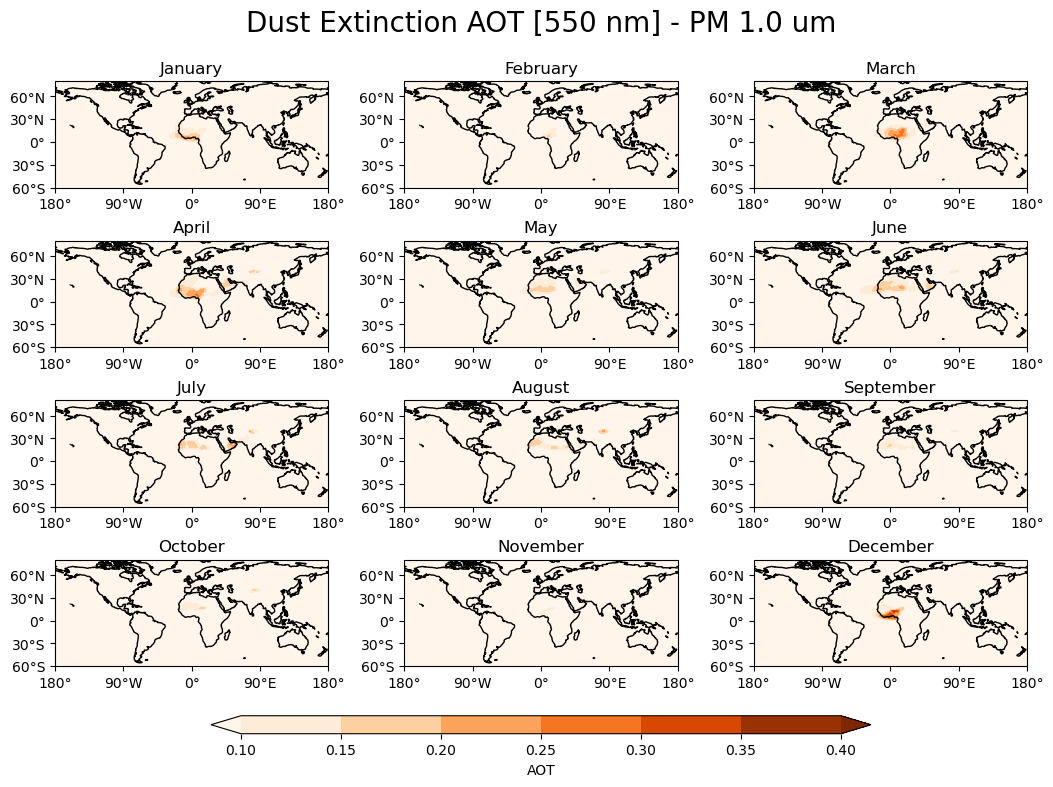

In [14]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11, 9))

# Define a custom extent to exclude Antarctica
custom_extent = [-180, 180, -60, 80]  # [lon_min, lon_max, lat_min, lat_max]

# Find the minimum non-zero value in your data
min_nonzero = ds_dust['DUEXTTFM'].where(ds_dust['DUEXTTFM'] > 0, drop=True).min().values

# Sets range for data
clevs = np.arange(.1, 0.45, 0.05)

# axs is a 2-dimensional array of GeoAxes.
# We will flatten it into a 1-D array
axs = axs.flatten()

# List of full month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop over all of the seasons and plot
for i, dust in enumerate(ds_dust['month']):

    # Select the season
    data = ds_dust['DUEXTTFM'].sel(month=dust)

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=ds_dust['lon'])

    # Contour plot
    cs = axs[i].contourf(lons, ds_dust['lat'], data, clevs,
                        transform=ccrs.PlateCarree(),
                        cmap='Oranges', extend='both')

    # Set the custom extent
    axs[i].set_extent(custom_extent, crs=ccrs.PlateCarree())

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 90), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-60, 81, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the month
    axs[i].set_title(month_names[i])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='AOT')

# Adds title at the top
plt.suptitle('Dust Extinction AOT [550 nm] - PM 1.0 um', fontsize=20)

plt.show()